In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

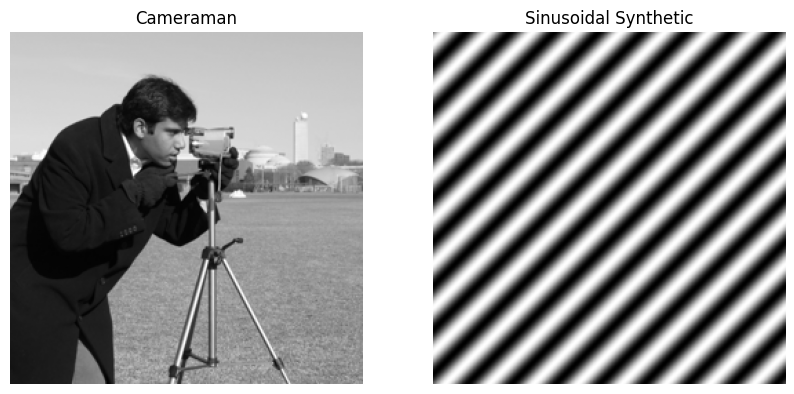

In [2]:
# Reading the images in grayscale
cam = cv2.imread('/content/Cameraman.png', cv2.IMREAD_GRAYSCALE)
sine = cv2.imread('/content/Sinusoidal-Synthetic.png', cv2.IMREAD_GRAYSCALE)

# Displaying the two images
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(cam, cmap='gray')
plt.title('Cameraman')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(sine, cmap='gray')
plt.title('Sinusoidal Synthetic')
plt.axis('off')
plt.show()



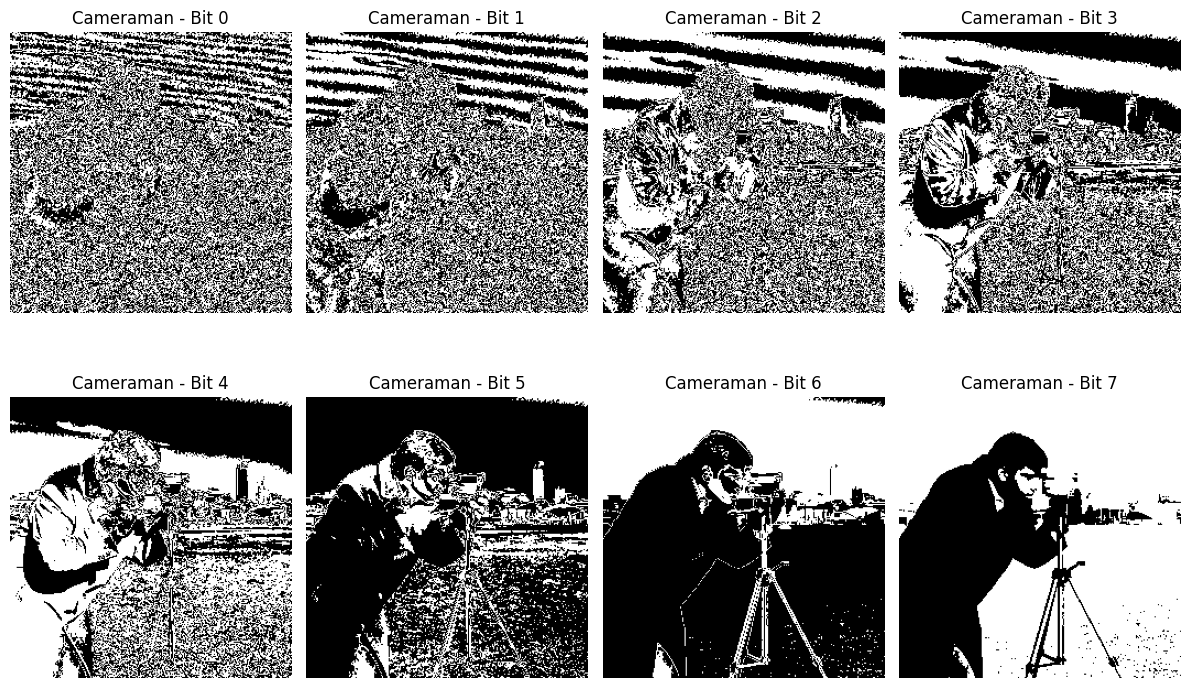

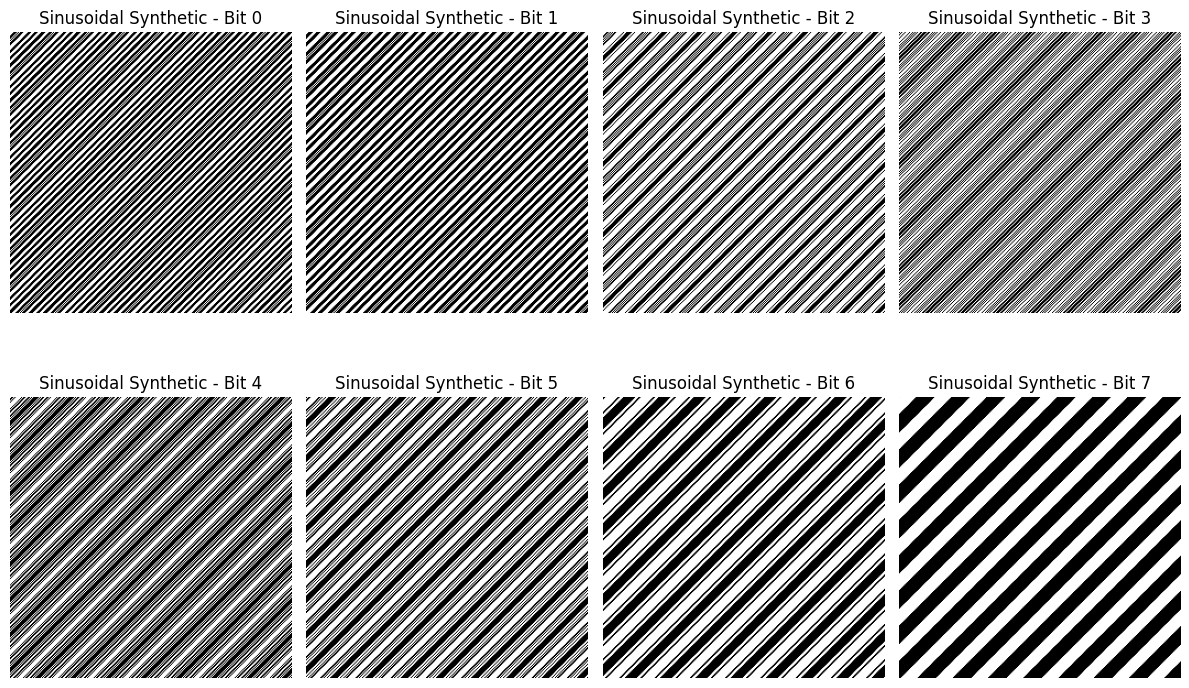

In [3]:
# Reading the images in grayscale
cam = cv2.imread('/content/Cameraman.png', cv2.IMREAD_GRAYSCALE)
sine = cv2.imread('/content/Sinusoidal-Synthetic.png', cv2.IMREAD_GRAYSCALE)

def extract_bit_planes(image, title_prefix):
    plt.figure(figsize=(12, 8))

    for i in range(8):  # From bit 0 to 7
        # Extracting the i-th bit
        bit_plane = ((image >> i) & 1) * 255  # Multiply by 255 for clear display (0 or 255)

        # Plotting the bit plane
        plt.subplot(2, 4, i + 1)
        plt.imshow(bit_plane, cmap='gray')
        plt.title(f'{title_prefix} - Bit {i}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()


# Extracting and displaying the bit planes for each image
extract_bit_planes(cam, 'Cameraman')
extract_bit_planes(sine, 'Sinusoidal Synthetic')



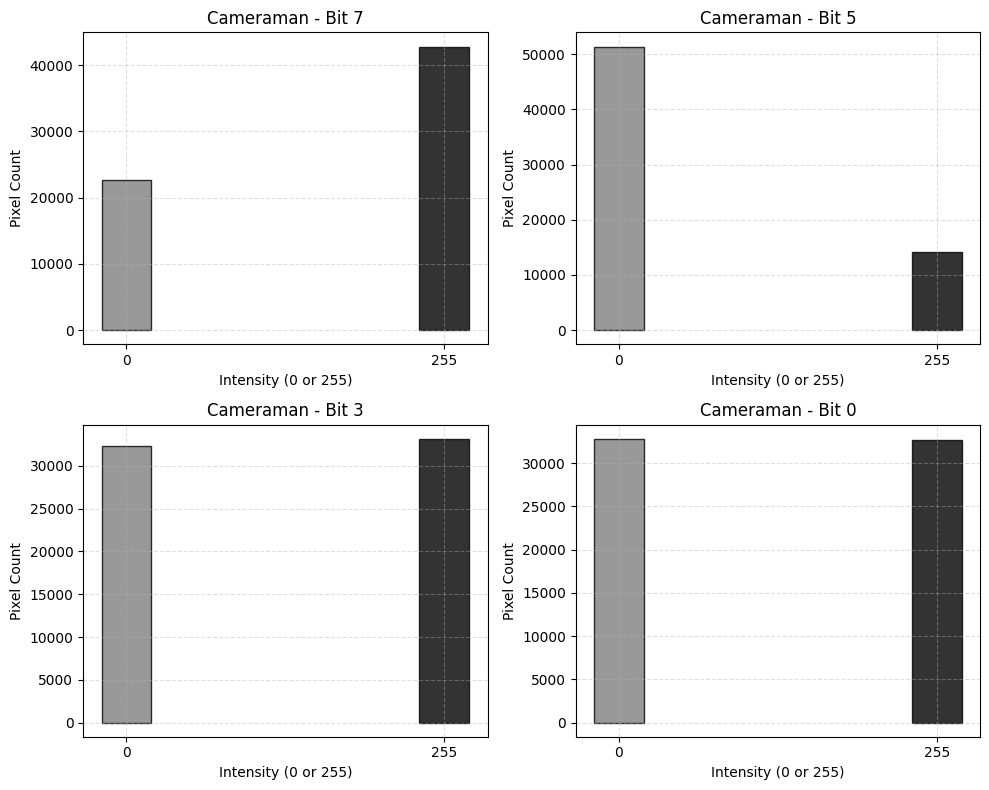

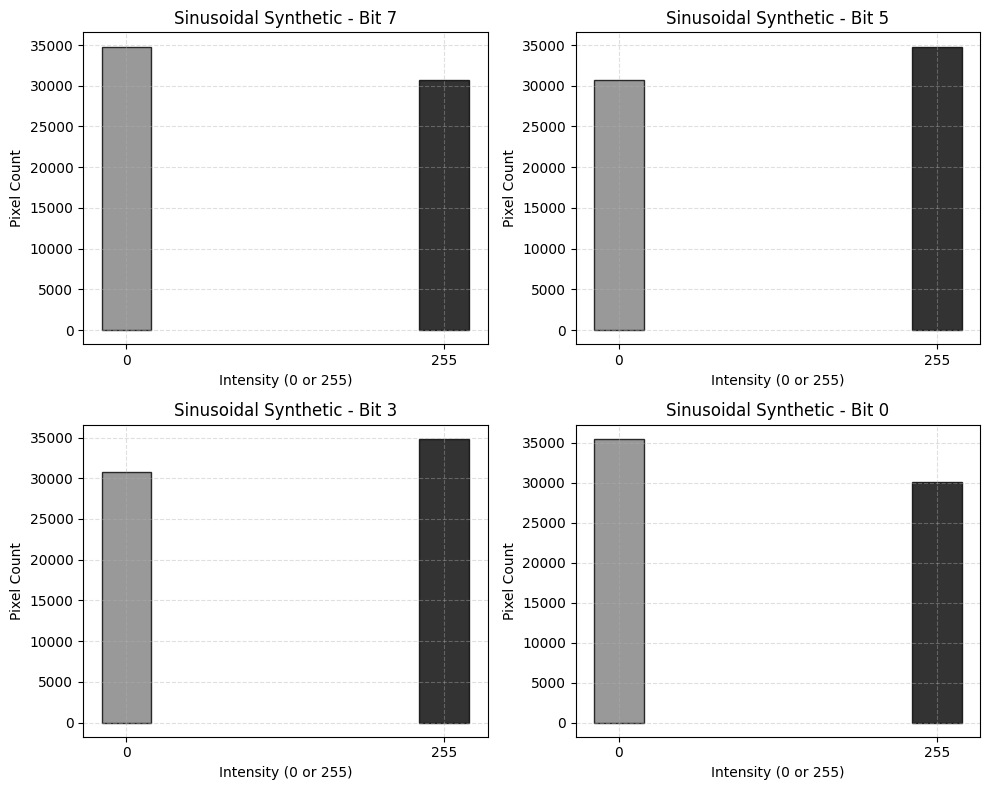

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Reading the images in grayscale
cam = cv2.imread('/content/Cameraman.png', cv2.IMREAD_GRAYSCALE)
sine = cv2.imread('/content/Sinusoidal-Synthetic.png', cv2.IMREAD_GRAYSCALE)

if cam is None or sine is None:
    raise ValueError(" The image paths are incorrect!")

def extract_bit_plane(image, bit):
    return ((image >> bit) & 1) * 255

def plot_bitplane_histograms_manual(image, title_prefix):
    bits = [7, 5, 3, 0]
    plt.figure(figsize=(10, 8))

    for idx, bit in enumerate(bits):
        bit_plane = extract_bit_plane(image, bit)

        # Counting the number of pixels with value 0 and 255
        zeros = np.sum(bit_plane == 0)
        ones = np.sum(bit_plane == 255)

        # Setting up x and y axes
        xs = [0, 255]
        ys = [zeros, ones]

        plt.subplot(2, 2, idx + 1)

        # Manually plotting the bars with fill_between or manual fill
        bar_width = 40  # Width of each bar
        for x, y in zip(xs, ys):
            # Rectangle corners
            x_left = x - bar_width / 2
            x_right = x + bar_width / 2
            plt.fill(
                [x_left, x_left, x_right, x_right],
                [0, y, y, 0],
                color='black' if x == 255 else 'gray',
                alpha=0.8,
                edgecolor='black'
            )

        plt.title(f"{title_prefix} - Bit {bit}")
        plt.xlabel("Intensity (0 or 255)")
        plt.ylabel("Pixel Count")
        plt.xticks([0, 255])
        plt.grid(True, linestyle='--', alpha=0.4)

    plt.tight_layout()
    plt.show()

# Running for both images
plot_bitplane_histograms_manual(cam, "Cameraman")
plot_bitplane_histograms_manual(sine, "Sinusoidal Synthetic")
